In [ ]:
# !pip install pyesgf-search netCDF4 xarray
!pip install requests netCDF4 xarray


In [4]:
import requests
import os

# ESGF search endpoint
search_url = "https://esgf-node.llnl.gov/esg-search/search/"

# Search parameters
params = {
    'project': 'CMIP6',
    'experiment_id': 'ssp245',  # SSP2-4.5 scenario
    'variable_id': 'tas',  # Example: Temperature at Surface
    'frequency': 'mon',  # Monthly data
    'source_id': 'ACCESS-CM2',  # Specific climate model (can be adjusted)
    'member_id': 'r1i1p1f1',  # Specific ensemble member
    'grid_label': 'gn',  # Grid label
    'latest': 'true',  # Only latest datasets
    'type': 'File',
    'format': 'application/solr+json',  # Request JSON format
    'limit': '10'  # Number of results to return
}

# Perform search
response = requests.get(search_url, params=params)
data = response.json()

# Print the number of files found
print(f"Found {len(data['response']['docs'])} files.")

# Download the first file
if data['response']['docs']:
    first_file = data['response']['docs'][0]
    download_url = first_file['url'][0].split('|')[0]  # Extract the download link
    file_name = first_file['title']

    # Download the file
    response = requests.get(download_url)
    file_path = os.path.join(os.getcwd(), file_name)
    with open(file_path, 'wb') as f:
        f.write(response.content)

    print(f"Downloaded {file_name} to {file_path}")
else:
    print("No files found for the given query.")


Found 5 files.
Downloaded tas_Amon_ACCESS-CM2_ssp245_r1i1p1f1_gn_201501-210012.nc to /content/tas_Amon_ACCESS-CM2_ssp245_r1i1p1f1_gn_201501-210012.nc


<xarray.Dataset> Size: 114MB
Dimensions:    (time: 1032, bnds: 2, lat: 144, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 8kB 2015-01-16T12:00:00 ... 2100-12-16T1...
  * lat        (lat) float64 1kB -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * lon        (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 17kB ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    tas        (time, lat, lon) float32 114MB ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60265.0
    branch_time_in_parent:  60265.0
    creation_date:          2019-11-08T03:14:39Z
    ...                     ...
    variable_id:            tas
    variant_label:          r1i1p1f1
    version:                v2

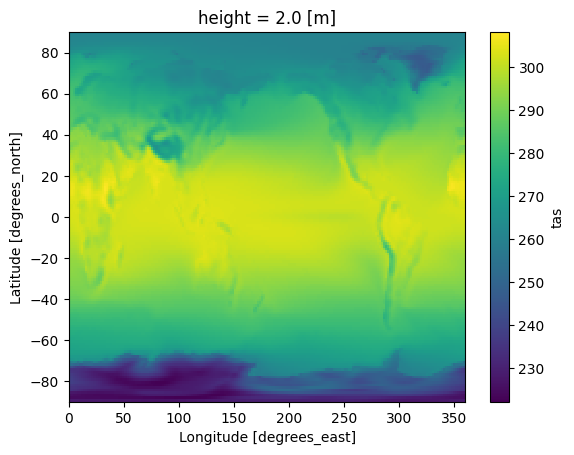

In [5]:
import xarray as xr

# Load the dataset
data = xr.open_dataset(file_path)

# Display the dataset structure
print(data)

# Example: Access temperature data and plot it
tas_data = data['tas']  # Access the temperature data
tas_data.mean(dim='time').plot()  # Plot the average temperature


In [10]:
# !pip install rasterio requests


In [ ]:
import os
import requests

# Define the base URL for WorldClim datasets
base_url = "https://biogeo.ucdavis.edu/data/worldclim/v2.1/base/wc2.1_30s_"

# Define the variables you want to download
variables = [
    "bio",  # Bioclimatic variables (bio1-bio19)
    "aspect",  # Aspect
    "srad"  # Solar radiation
]

# Function to download a dataset
def download_file(url, dest_folder):
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)
    file_name = url.split("/")[-1]
    file_path = os.path.join(dest_folder, file_name)
    if not os.path.exists(file_path):
        print(f"Downloading {file_name} ...")
        response = requests.get(url)
        with open(file_path, 'wb') as file:
            file.write(response.content)
        print(f"Downloaded {file_name}")
    else:
        print(f"{file_name} already exists.")
    return file_path

# Download each variable
for var in variables:
    if var == "bio":
        # Bioclimatic variables are numbered 1-19
        for i in range(1, 20):
            url = f"{base_url}{var}{i:02d}.tif"
            download_file(url, "./worldclim_data")
    else:
        # Aspect and solar radiation
        url = f"{base_url}{var}.tif"
        download_file(url, "./worldclim_data")


 Download Future Climate Data from WorldClim

In [ ]:
import os
import requests

# Define the base URL for WorldClim future datasets
base_url = "https://biogeo.ucdavis.edu/data/worldclim/v2.1/"

# Define the GCM, SSP, and year
gcm = "BCC-CSM2-MR"  # Example: Global Climate Model
ssp = "ssp245"  # Scenario (e.g., SSP2-4.5)
year = "2041-2060"  # Time period (mid-century)

# Define the variables you want to download
variables = [
    "bio",  # Bioclimatic variables (bio1-bio19)
    "srad"  # Solar radiation (monthly)
]

# Function to download a dataset
def download_file(url, dest_folder):
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)
    file_name = url.split("/")[-1]
    file_path = os.path.join(dest_folder, file_name)
    if not os.path.exists(file_path):
        print(f"Downloading {file_name} ...")
        response = requests.get(url)
        with open(file_path, 'wb') as file:
            file.write(response.content)
        print(f"Downloaded {file_name}")
    else:
        print(f"{file_name} already exists.")
    return file_path

# Download each variable
for var in variables:
    if var == "bio":
        # Bioclimatic variables are numbered 1-19
        for i in range(1, 20):
            url = f"{base_url}future/{gcm}/{ssp}/{year}/wc2.1_30s_{var}{i:02d}.tif"
            download_file(url, "./worldclim_future_data")
    elif var == "srad":
        # Solar radiation
        for month in range(1, 13):  # Monthly data
            url = f"{base_url}future/{gcm}/{ssp}/{year}/wc2.1_30s_{var}_{month:02d}.tif"
            download_file(url, "./worldclim_future_data")


In [ ]:
# Downloading Data for Multiple Models and Scenarios
gcms = ["BCC-CSM2-MR", "CNRM-CM6-1", "MIROC6"]  # List of GCMs
ssps = ["ssp245", "ssp585"]  # List of scenarios

for gcm in gcms:
    for ssp in ssps:
        # Use the same download loop here
        for var in variables:
            # Download process as shown in the previous step


In [ ]:
# Analyze Future Data
import rasterio
import matplotlib.pyplot as plt

# Function to load and plot a raster file
def plot_raster(file_path):
    with rasterio.open(file_path) as src:
        fig, ax = plt.subplots(figsize=(10, 10))
        rasterio.plot.show(src, ax=ax, title=os.path.basename(file_path))

# Example: Plot a future bioclimatic variable
plot_raster("./worldclim_future_data/wc2.1_30s_bio01.tif")
